# Part 3.5: Snow Cover Dataset

In this part we will include in-situ snow measurements from German stations operated by DWD. In the future it would be useful to add Swiss stations too, but I could only find monthly data for them, so they are not added.

#### Dataset
Matiu, M., Crespi, A., Bertoldi, G., Carmagnola, C. M., Marty, C., Morin, S., Schöner, W., Cat Berro, D., Chiogna, G., De Gregorio, L., Kotlarski, S., Majone, B., Resch, G., Terzago, S., Valt, M., Beozzo, W., Cianfarra, P., Gouttevin, I., Marcolini, G., … Weilguni, V. (2021). Snow cover in the European Alps: Station observations of snow depth and depth of snowfall (v1.3). Zenodo. https://doi.org/10.5281/zenodo.5109574


## Basin and subbasin information

We have finalized these geographic boundaries in ML2. We read-in what we saved as a result of that study.

In [1]:
# Read-in the water level dataset and check the content
%matplotlib inline

import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
INF_str = "/Users/oncel/Documents/Projects/KoelnPegelML/data/"
# Read-in the netCDF file
INFILE_base = "/Users/oncel/Documents/Projects/KoelnPegelML/data/"

In [2]:
import geopandas as gpd
cologne_catchment = gpd.read_file("Cologne_upstream_catchment.shp")
print(cologne_catchment.head())

    NEXT_SINK    HYBAS_ID   NEXT_DOWN    MAIN_BAS  DIST_SINK  DIST_MAIN  \
0  2080023010  2080399810  2080392830  2080023010      300.6      300.6   
1  2080103570  2080103570  2080472700  2080023010        0.0      788.7   
2  2080109860  2080109860  2080411370  2080023010        0.0      381.2   

   SUB_AREA   UP_AREA   PFAF_ID  ENDO  COAST  ORDER   SORT  \
0    2002.1  145502.9  23261070     0      0      1   6337   
1      36.0      36.0  23267090     2      0      2  25285   
2      10.9      10.9  23261090     2      0      2  25313   

                                            geometry  
0  POLYGON ((6.94804 46.5464, 6.93946 46.54527, 6...  
1  POLYGON ((6.9875 47.18333, 6.98399 47.18423, 6...  
2  POLYGON ((7.24167 50.40417, 7.24167 50.40833, ...  


In [17]:
cologne_subbasins = gpd.read_file("cologne_subbasins_lvl5.shp")
print(cologne_subbasins.head())

   HYBAS_ID_1  NEXT_DOWN_   NEXT_SINK  MAIN_BAS_1  DIST_SINK_  DIST_MAIN_  \
0  2050465610  2050477000  2050008490  2050008490      2372.5      2372.5   
1  2050023010           0  2050023010  2050023010         0.0         0.0   
2  2050023010           0  2050023010  2050023010         0.0         0.0   
3  2050420240  2050023010  2050023010  2050023010       447.8       447.8   
4  2050420340  2050023010  2050023010  2050023010       447.9       447.9   

   SUB_AREA_1  UP_AREA_1  PFAF_ID_1  ENDO_1  ...  DIST_SIN_1  DIST_MAI_1  \
0     50388.9    50388.9      22799       0  ...       300.6       300.6   
1     25335.7   163008.5      23261       0  ...       300.6       300.6   
2     25335.7   163008.5      23261       0  ...         0.0       381.2   
3     28101.2    28101.4      23262       0  ...       300.6       300.6   
4     11589.0   109585.3      23263       0  ...       300.6       300.6   

   SUB_AREA_2  UP_AREA_2  PFAF_ID_2  ENDO_2  COAST_2  ORDER_2  SORT_2  \
0      

In [4]:
# --- 2. Cologne coordinates ---
cologne_point = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy([6.96], [50.94]),  # lon, lat
    crs=cologne_catchment.crs
)

## Create a single dataset by combining snow per station with coordinate per station datasets

In [5]:
INFILE_str = "/Users/oncel/Documents/Projects/KoelnPegelML/data/"

In [6]:
# Load daily snow cover data
df_snow = pd.read_csv(INFILE_str+"data_daily_DE_DWD.csv", parse_dates=["Date"])
print(df_snow.head())

  Provider  Name       Date   HN   HS  HN_after_qc  HS_after_qc  \
0   DE_DWD  Aach 1961-01-01  0.0  5.0          0.0          5.0   
1   DE_DWD  Aach 1961-01-02  2.0  7.0          2.0          7.0   
2   DE_DWD  Aach 1961-01-03  0.0  6.0          0.0          6.0   
3   DE_DWD  Aach 1961-01-04  0.0  4.0          0.0          4.0   
4   DE_DWD  Aach 1961-01-05  0.0  3.0          0.0          3.0   

   HS_after_gapfill  
0               5.0  
1               7.0  
2               6.0  
3               4.0  
4               3.0  


In [7]:
# Just want the data starting from 2000
df_snow = df_snow[df_snow["Date"]>"1999-12-31"]
df_snow

,Provider,Name,Date,HN,HS,HN_after_qc,HS_after_qc,HS_after_gapfill
16436,DE_DWD,Aalen_Unterrombach,2000-01-01,0.0,13.0,0.0,13.0,13.0
16437,DE_DWD,Aalen_Unterrombach,2000-01-02,0.0,5.0,0.0,5.0,5.0
16438,DE_DWD,Aalen_Unterrombach,2000-01-03,0.0,0.0,0.0,0.0,0.0
16439,DE_DWD,Aalen_Unterrombach,2000-01-04,0.0,0.0,0.0,0.0,0.0
16440,DE_DWD,Aalen_Unterrombach,2000-01-05,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12352590,DE_DWD,Zwiefalten,2003-12-27,0.0,3.0,0.0,3.0,3.0
12352591,DE_DWD,Zwiefalten,2003-12-28,0.0,0.0,0.0,0.0,0.0
12352592,DE_DWD,Zwiefalten,2003-12-29,0.0,0.0,0.0,0.0,0.0
12352593,DE_DWD,Zwiefalten,2003-12-30,0.0,0.0,0.0,0.0,0.0


## Snow cover per subbasin

In [51]:
# Load station metadata with coordinates
df_meta = pd.read_csv(INFILE_str+"snowcover_metadata.csv")

# Merge on station name
df_merged = pd.merge(
    df_snow,
    df_meta[["Name", "Longitude", "Latitude", "Elevation"]],
    on="Name",
    how="left"
)

# Save final dataset
df_merged.to_csv("snowcover_with_coords.csv", index=False)

print(df_merged.head())


  Provider                Name       Date   HN    HS  HN_after_qc  \
0   DE_DWD  Aalen_Unterrombach 2000-01-01  0.0  13.0          0.0   
1   DE_DWD  Aalen_Unterrombach 2000-01-02  0.0   5.0          0.0   
2   DE_DWD  Aalen_Unterrombach 2000-01-03  0.0   0.0          0.0   
3   DE_DWD  Aalen_Unterrombach 2000-01-04  0.0   0.0          0.0   
4   DE_DWD  Aalen_Unterrombach 2000-01-05  0.0   0.0          0.0   

   HS_after_qc  HS_after_gapfill  Longitude  Latitude  Elevation  
0         13.0              13.0    10.0598   48.8361      455.0  
1          5.0               5.0    10.0598   48.8361      455.0  
2          0.0               0.0    10.0598   48.8361      455.0  
3          0.0               0.0    10.0598   48.8361      455.0  
4          0.0               0.0    10.0598   48.8361      455.0  


In [10]:
from shapely.geometry import Point

# Load merged snowcover data with coords
df_snow = pd.read_csv("snowcover_with_coords.csv", parse_dates=["Date"])

# Convert to GeoDataFrame
gdf_snow = gpd.GeoDataFrame(
    df_snow,
    geometry=gpd.points_from_xy(df_snow["Longitude"], df_snow["Latitude"]),
    crs="EPSG:4326"
)

In [11]:
# Spatial join: each station gets the subbasin ID where it falls
gdf_snow = gpd.sjoin(gdf_snow, cologne_subbasins[["HYBAS_ID_1", "geometry"]], how="left", predicate="within")


In [29]:
# Group by date + subbasin
df_snow_subbasin = (
    gdf_snow.groupby(["Date", "HYBAS_ID_1"])["HS_after_gapfill"]
    .mean()
    .reset_index()
)

# Pivot so columns = subbasins, rows = dates
df_snow_subbasin = df_snow_subbasin.pivot(index="Date", columns="HYBAS_ID_1", values="HS_after_gapfill")

df_snow_subbasin.columns = [f"sbs_snow_{c}" for c in df_snow_subbasin.columns]

In [30]:
mapping = {
    "sbs_snow_2050441280.0": "sbs_snow_oberrhein",
    "sbs_snow_2050441290.0": "sbs_snow_neckar",
    "sbs_snow_2050491760.0": "sbs_snow_alps",
}

df_snow_subbasin = df_snow_subbasin.rename(columns=mapping)

In [31]:
print(df_snow_subbasin)

            sbs_snow_oberrhein  sbs_snow_neckar  sbs_snow_alps
Date                                                          
2000-01-01           14.434783             8.03      17.651163
2000-01-02           12.608696             4.89      15.209302
2000-01-03           11.456522             3.73      13.465116
2000-01-04           10.358696             3.14      12.627907
2000-01-05            8.500000             1.98      10.325581
...                        ...              ...            ...
2018-12-27            0.565217             0.00       0.440000
2018-12-28            0.565217             0.00       0.440000
2018-12-29            0.565217             0.00       0.400000
2018-12-30            0.304348             0.00       0.840000
2018-12-31            0.326087             0.00       1.440000

[6940 rows x 3 columns]


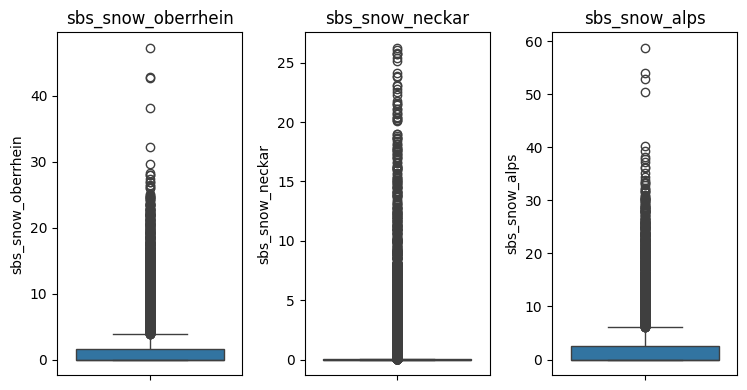

In [32]:
# Check the distributions
import math
import seaborn as sns
ncols = 6
nrows = math.ceil(len(df_snow_subbasin.columns) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*4))

for ax, col in zip(axes.flat, df_snow_subbasin.columns):
    #sns.violinplot(y=df_precip_subbasins[col], ax=ax) goes to minimum although there is no minimum
    sns.boxplot(y=df_snow_subbasin[col], ax=ax)
    ax.set_title(col)
    #ax.set_yscale("log")                 # log scale
    #ax.set_ylim(0,100)              # fixed limits across all plots

# Hide empty subplots
for ax in axes.flat[len(df_snow_subbasin.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## Adding info to the training dataset

In [33]:
df_snow_subbasin.to_csv("training_datasets/train_snow_preprocessed.csv", index=True) 
print(df_snow_subbasin)

            sbs_snow_oberrhein  sbs_snow_neckar  sbs_snow_alps
Date                                                          
2000-01-01           14.434783             8.03      17.651163
2000-01-02           12.608696             4.89      15.209302
2000-01-03           11.456522             3.73      13.465116
2000-01-04           10.358696             3.14      12.627907
2000-01-05            8.500000             1.98      10.325581
...                        ...              ...            ...
2018-12-27            0.565217             0.00       0.440000
2018-12-28            0.565217             0.00       0.440000
2018-12-29            0.565217             0.00       0.400000
2018-12-30            0.304348             0.00       0.840000
2018-12-31            0.326087             0.00       1.440000

[6940 rows x 3 columns]
